In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
df = pd.read_csv('dataset.csv')
df_s = pd.read_csv('Symptom-severity.csv')

In [11]:
(df.isnull().sum()/df.shape[0])*100

Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64

In [12]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [13]:
#Drop columns that have more than 55% missing values

df = df.drop(columns = ['Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'], axis =1)
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7'],
      dtype='object')

In [15]:
#Replace hyphen with space in both dataframes

for i in df.columns:
    df[i] = df[i].str.replace('_',' ')

df_s['Symptom'] = df_s['Symptom'].str.replace('_',' ')

In [17]:
#making a dictionary to replace the dataframe values in df

df_s_dict = df_s.set_index('Symptom').T.to_dict('records')
df_s_dict

C:\Users\MYFIRS~1\AppData\Local\Temp/ipykernel_5392/1490407438.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  df_s_dict = df_s.set_index('Symptom').T.to_dict('records')


[{'itching': 1,
  'skin rash': 3,
  'nodal skin eruptions': 4,
  'continuous sneezing': 4,
  'shivering': 5,
  'chills': 3,
  'joint pain': 3,
  'stomach pain': 5,
  'acidity': 3,
  'ulcers on tongue': 4,
  'muscle wasting': 3,
  'vomiting': 5,
  'burning micturition': 6,
  'spotting urination': 6,
  'fatigue': 4,
  'weight gain': 3,
  'anxiety': 4,
  'cold hands and feets': 5,
  'mood swings': 3,
  'weight loss': 3,
  'restlessness': 5,
  'lethargy': 2,
  'patches in throat': 6,
  'irregular sugar level': 5,
  'cough': 4,
  'high fever': 7,
  'sunken eyes': 3,
  'breathlessness': 4,
  'sweating': 3,
  'dehydration': 4,
  'indigestion': 5,
  'headache': 3,
  'yellowish skin': 3,
  'dark urine': 4,
  'nausea': 5,
  'loss of appetite': 4,
  'pain behind the eyes': 4,
  'back pain': 3,
  'constipation': 4,
  'abdominal pain': 4,
  'diarrhoea': 6,
  'mild fever': 5,
  'yellow urine': 4,
  'yellowing of eyes': 4,
  'acute liver failure': 6,
  'fluid overload': 4,
  'swelling of stomach': 7,

In [19]:
#Creating a variable for mapping
var_map = {'itching': 1,
  'skin rash': 3,
  'nodal skin eruptions': 4,
  'continuous sneezing': 4,
  'shivering': 5,
  'chills': 3,
  'joint pain': 3,
  'stomach pain': 5,
  'acidity': 3,
  'ulcers on tongue': 4,
  'muscle wasting': 3,
  'vomiting': 5,
  'burning micturition': 6,
  'spotting urination': 6,
  'fatigue': 4,
  'weight gain': 3,
  'anxiety': 4,
  'cold hands and feets': 5,
  'mood swings': 3,
  'weight loss': 3,
  'restlessness': 5,
  'lethargy': 2,
  'patches in throat': 6,
  'irregular sugar level': 5,
  'cough': 4,
  'high fever': 7,
  'sunken eyes': 3,
  'breathlessness': 4,
  'sweating': 3,
  'dehydration': 4,
  'indigestion': 5,
  'headache': 3,
  'yellowish skin': 3,
  'dark urine': 4,
  'nausea': 5,
  'loss of appetite': 4,
  'pain behind the eyes': 4,
  'back pain': 3,
  'constipation': 4,
  'abdominal pain': 4,
  'diarrhoea': 6,
  'mild fever': 5,
  'yellow urine': 4,
  'yellowing of eyes': 4,
  'acute liver failure': 6,
  'fluid overload': 4,
  'swelling of stomach': 7,
  'swelled lymph nodes': 6,
  'malaise': 6,
  'blurred and distorted vision': 5,
  'phlegm': 5,
  'throat irritation': 4,
  'redness of eyes': 5,
  'sinus pressure': 4,
  'runny nose': 5,
  'congestion': 5,
  'chest pain': 7,
  'weakness in limbs': 7,
  'fast heart rate': 5,
  'pain during bowel movements': 5,
  'pain in anal region': 6,
  'bloody stool': 5,
  'irritation in anus': 6,
  'neck pain': 5,
  'dizziness': 4,
  'cramps': 4,
  'bruising': 4,
  'obesity': 4,
  'swollen legs': 5,
  'swollen blood vessels': 5,
  'puffy face and eyes': 5,
  'enlarged thyroid': 6,
  'brittle nails': 5,
  'swollen extremeties': 5,
  'excessive hunger': 4,
  'extra marital contacts': 5,
  'drying and tingling lips': 4,
  'slurred speech': 4,
  'knee pain': 3,
  'hip joint pain': 2,
  'muscle weakness': 2,
  'stiff neck': 4,
  'swelling joints': 5,
  'movement stiffness': 5,
  'spinning movements': 6,
  'loss of balance': 4,
  'unsteadiness': 4,
  'weakness of one body side': 4,
  'loss of smell': 3,
  'bladder discomfort': 4,
  'foul smell ofurine': 5,
  'continuous feel of urine': 6,
  'passage of gases': 5,
  'internal itching': 4,
  'toxic look (typhos)': 5,
  'depression': 3,
  'irritability': 2,
  'muscle pain': 2,
  'altered sensorium': 2,
  'red spots over body': 3,
  'belly pain': 4,
  'abnormal menstruation': 6,
  'dischromic patches': 6,
  'watering from eyes': 4,
  'increased appetite': 5,
  'polyuria': 4,
  'family history': 5,
  'mucoid sputum': 4,
  'rusty sputum': 4,
  'lack of concentration': 3,
  'visual disturbances': 3,
  'receiving blood transfusion': 5,
  'receiving unsterile injections': 2,
  'coma': 7,
  'stomach bleeding': 6,
  'distention of abdomen': 4,
  'history of alcohol consumption': 5,
  'blood in sputum': 5,
  'prominent veins on calf': 6,
  'palpitations': 4,
  'painful walking': 2,
  'pus filled pimples': 2,
  'blackheads': 2,
  'scurring': 2,
  'skin peeling': 3,
  'silver like dusting': 2,
  'small dents in nails': 2,
  'inflammatory nails': 2,
  'blister': 4,
  'red sore around nose': 2,
  'yellow crust ooze': 3,
  'prognosis': 5}

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4572 non-null   object
 5   Symptom_5  3714 non-null   object
 6   Symptom_6  2934 non-null   object
 7   Symptom_7  2268 non-null   object
dtypes: object(8)
memory usage: 307.6+ KB


In [37]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [38]:
#This is important as without it we cannot replace any values
#Here we first flatten the df to retrieve all values, then we turn it into a series, then we strip it of all spaces which are 
#hard to observe , then we reshape it again into our dataframe
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN


In [41]:
#Taking care of missing values
df = df.fillna(0)
df.isnull().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [42]:
#Create a new dataframe with the replaced values
df_new = df.replace(var_map)
df_new.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


In [48]:
#Check if all variables are mapped
for i in df_new.columns:
    print(df_new[i].unique())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
[1 3 4 5 6 7 2]
[3 4 5 6 7 2 0]
[4 0 3 5 6 7 2]
[0 4 5 6 2 3 7]
[0 4 7 5 3 6 2]
[0 7 4 5 3 6 2]
[0 4 3 2 6 5]


In [47]:
#We see 3 values are still unmapped so we map them

df_new = df_new.replace({'foul smell of urine':0,'dischromic  patches':0,'spotting  urination':0})
df_new.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


In [50]:
# Now we see that all the variables are mapped to their respective weights. Now we can go ahead and split the data in to train
# and test and carry with our model

X = df_new.drop(columns='Disease')
y = df_new['Disease']



In [52]:
#Splitting our data in to training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
#We use grid search to find best parameters for our model
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan na

Best parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
#Now that we know our best hyper parameters lets train the model using these parameters we used 700 instead of 100 to get 
#higher accuracy
rf_clf = RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)
rf_clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 700building tree 2 of 700
building tree 3 of 700

building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700building tree 14 of 700

building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700building tree 27 of 700
building tree 28 of 700

building tree 29 of 700building tree 30 of 700

building tree 31 of 700
building tree 32 of 700
building tree 33 of 700building tree 34 of 700
building tree 35 of 700
building tree 36 of 700building tree 37 of 700

building tree 38 of 700
building tree 39 of 700

building tree 40 of 700building tree 41 of 700
building tree 42 of 700

b

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.4s


building tree 117 of 700
building tree 118 of 700


building tree 119 of 700
building tree 120 of 700
building tree 121 of 700building tree 122 of 700
building tree 123 of 700building tree 124 of 700

building tree 125 of 700

building tree 126 of 700
building tree 127 of 700
building tree 128 of 700building tree 129 of 700

building tree 130 of 700
building tree 131 of 700
building tree 132 of 700
building tree 133 of 700
building tree 134 of 700
building tree 135 of 700
building tree 136 of 700
building tree 137 of 700
building tree 138 of 700building tree 139 of 700
building tree 140 of 700
building tree 141 of 700
building tree 142 of 700

building tree 143 of 700
building tree 144 of 700building tree 145 of 700
building tree 146 of 700
building tree 147 of 700

building tree 148 of 700
building tree 149 of 700
building tree 150 of 700
building tree 151 of 700
building tree 152 of 700
building tree 153 of 700
building tree 154 of 700
building tree 155 of 700
building tree 156 of 70

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.6s


building tree 233 of 700
building tree 234 of 700
building tree 235 of 700building tree 236 of 700
building tree 237 of 700
building tree 238 of 700building tree 239 of 700


building tree 240 of 700
building tree 241 of 700building tree 242 of 700
building tree 243 of 700building tree 244 of 700

building tree 245 of 700

building tree 246 of 700building tree 247 of 700

building tree 248 of 700
building tree 249 of 700building tree 250 of 700

building tree 251 of 700building tree 252 of 700building tree 253 of 700


building tree 254 of 700building tree 255 of 700

building tree 256 of 700
building tree 257 of 700
building tree 258 of 700
building tree 259 of 700building tree 260 of 700

building tree 261 of 700
building tree 262 of 700
building tree 263 of 700
building tree 264 of 700
building tree 265 of 700building tree 266 of 700building tree 267 of 700

building tree 268 of 700

building tree 269 of 700
building tree 270 of 700building tree 271 of 700

building tree 272 of 700


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.9s


building tree 481 of 700
building tree 482 of 700
building tree 483 of 700
building tree 484 of 700
building tree 485 of 700building tree 486 of 700
building tree 487 of 700

building tree 488 of 700
building tree 489 of 700building tree 490 of 700building tree 491 of 700
building tree 492 of 700


building tree 493 of 700building tree 494 of 700
building tree 495 of 700

building tree 496 of 700
building tree 497 of 700building tree 498 of 700

building tree 499 of 700building tree 500 of 700building tree 501 of 700


building tree 502 of 700building tree 503 of 700

building tree 504 of 700building tree 505 of 700

building tree 506 of 700building tree 507 of 700

building tree 508 of 700building tree 509 of 700

building tree 510 of 700building tree 511 of 700

building tree 512 of 700
building tree 513 of 700
building tree 514 of 700building tree 515 of 700

building tree 516 of 700
building tree 517 of 700
building tree 518 of 700
building tree 519 of 700
building tree 520 of 700


[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    1.4s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [72]:
#Now we have our trained model lets write a method for confusion matrix, classification report and accuracy
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [73]:
#Now lets see how our model performed first training set
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.3s finished


Train Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
           (vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  \
precision                                      1.0   1.0   1.0   
recall                                         1.0   1.0   1.0   
f1-score                                       1.0   1.0   1.0   
support                                      102.0  98.0  89.0   

           Alcoholic hepatitis    Allergy  Arthritis  Bronchial Asthma  \
precision                  1.0   0.915094        1.0               1.0   
recall                     1.0   1.000000        1.0               1.0   
f1-score                   1.0   0.955665        1.0               1.0   
support                   96.0  97.000000       97.0              92.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  ...  \
precision              1.000000          1.0                  1.0  ...   
recall                 0.956989          1

In [74]:
#Now lets see our test set
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.1s


Test Result:
Accuracy Score: 98.98%
_______________________________________________
CLASSIFICATION REPORT:
           (vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  \
precision                                      1.0   1.0   1.0   
recall                                         1.0   1.0   1.0   
f1-score                                       1.0   1.0   1.0   
support                                       18.0  22.0  31.0   

           Alcoholic hepatitis    Allergy  Arthritis  Bronchial Asthma  \
precision                  1.0   0.884615        1.0               1.0   
recall                     1.0   1.000000        1.0               1.0   
f1-score                   1.0   0.938776        1.0               1.0   
support                   24.0  23.000000       23.0              28.0   

           Cervical spondylosis  Chicken pox  Chronic cholestasis  ...  \
precision              1.000000          1.0                  1.0  ...   
recall                 0.925926          1.

[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished


In [69]:
#A variable for storing our predicted value
pred = rf_clf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished


<AxesSubplot:>

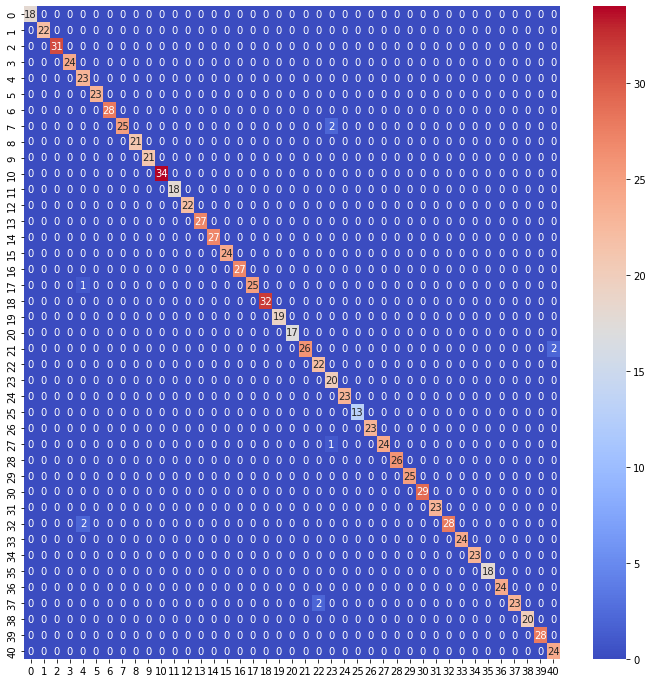

In [71]:
#Now lets visualize our confusion matrix as a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cbar=True,cmap='coolwarm')

## As we see we are getting a very good prediction with random forest classifier with test accuracy of 98%.

In [78]:
#Now lets write a method to predict some diseases
def predict(s1,s2,s3,s4,s5,s6,s7):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    result = [l]
    pred = rf_clf.predict(result)
    print(pred)

In [79]:
predict('itching',
  'skin rash',
  'nodal skin eruptions',
  'continuous sneezing',
  'shivering',
  'chills',
  'joint pain')

['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain']
['Chicken pox']


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.0s finished
